In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,106):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(1484, 100, 100, 3)

In [3]:
Xtest.shape

(212, 100, 100, 3)

In [4]:
ytrain.shape

(1484,)

In [5]:
ytest.shape

(212,)

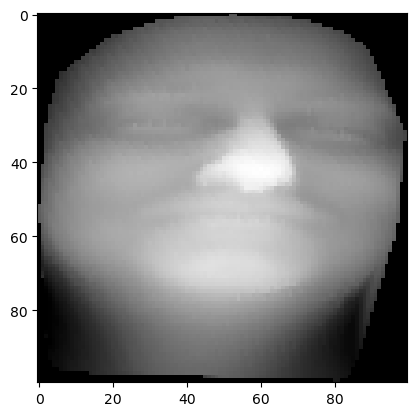

In [7]:
plt.imshow(Xtrain[1483])

In [8]:
ytrain[1483]

105

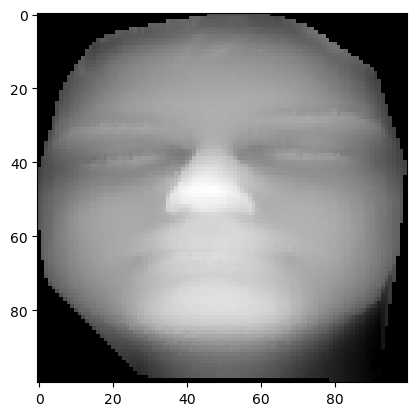

In [9]:
plt.imshow(Xtrain[211])

In [10]:
ytest[211]

105

In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.applications import DenseNet201

In [16]:
base_model=DenseNet201(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

In [17]:
for layer in base_model.layers[:-10]:
    layer.trainable=False

In [18]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(250,activation='relu'))

model.add(Dense(106,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 3, 3, 1920)        18321984  
                                                                 
 flatten_1 (Flatten)         (None, 17280)             0         
                                                                 
 dense_2 (Dense)             (None, 250)               4320250   
                                                                 
 dense_3 (Dense)             (None, 106)               26606     
                                                                 
Total params: 22668840 (86.47 MB)
Trainable params: 4633256 (17.67 MB)
Non-trainable params: 18035584 (68.80 MB)
_________________________________________________________________


In [19]:
model.fit(Xtrain,ytrain,epochs=10,validation_data=(Xtest,ytest))

Epoch 1/10
47/47 [==============================] - 50s 819ms/step - loss: 4.2566 - accuracy: 0.1765 - val_loss: 2.9976 - val_accuracy: 0.3585
Epoch 2/10
47/47 [==============================] - 37s 781ms/step - loss: 1.5171 - accuracy: 0.6631 - val_loss: 1.2828 - val_accuracy: 0.6745
Epoch 3/10
47/47 [==============================] - 36s 761ms/step - loss: 0.5311 - accuracy: 0.8733 - val_loss: 0.9472 - val_accuracy: 0.7925
Epoch 4/10
47/47 [==============================] - 37s 781ms/step - loss: 0.1638 - accuracy: 0.9717 - val_loss: 0.7503 - val_accuracy: 0.8396
Epoch 5/10
47/47 [==============================] - 37s 787ms/step - loss: 0.0924 - accuracy: 0.9879 - val_loss: 0.6619 - val_accuracy: 0.8538
Epoch 6/10
47/47 [==============================] - 62s 1s/step - loss: 0.0859 - accuracy: 0.9879 - val_loss: 0.6050 - val_accuracy: 0.8915
Epoch 7/10
47/47 [==============================] - 94s 2s/step - loss: 0.0243 - accuracy: 0.9987 - val_loss: 0.5266 - val_accuracy: 0.9009
Epoch

In [20]:
yprob=model.predict(Xtest)
yprob.shape

7/7 [==============================] - 8s 605ms/step


(212, 106)

In [21]:
ypred=yprob.argmax(axis=1)
ypred.shape

(212,)

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

[]

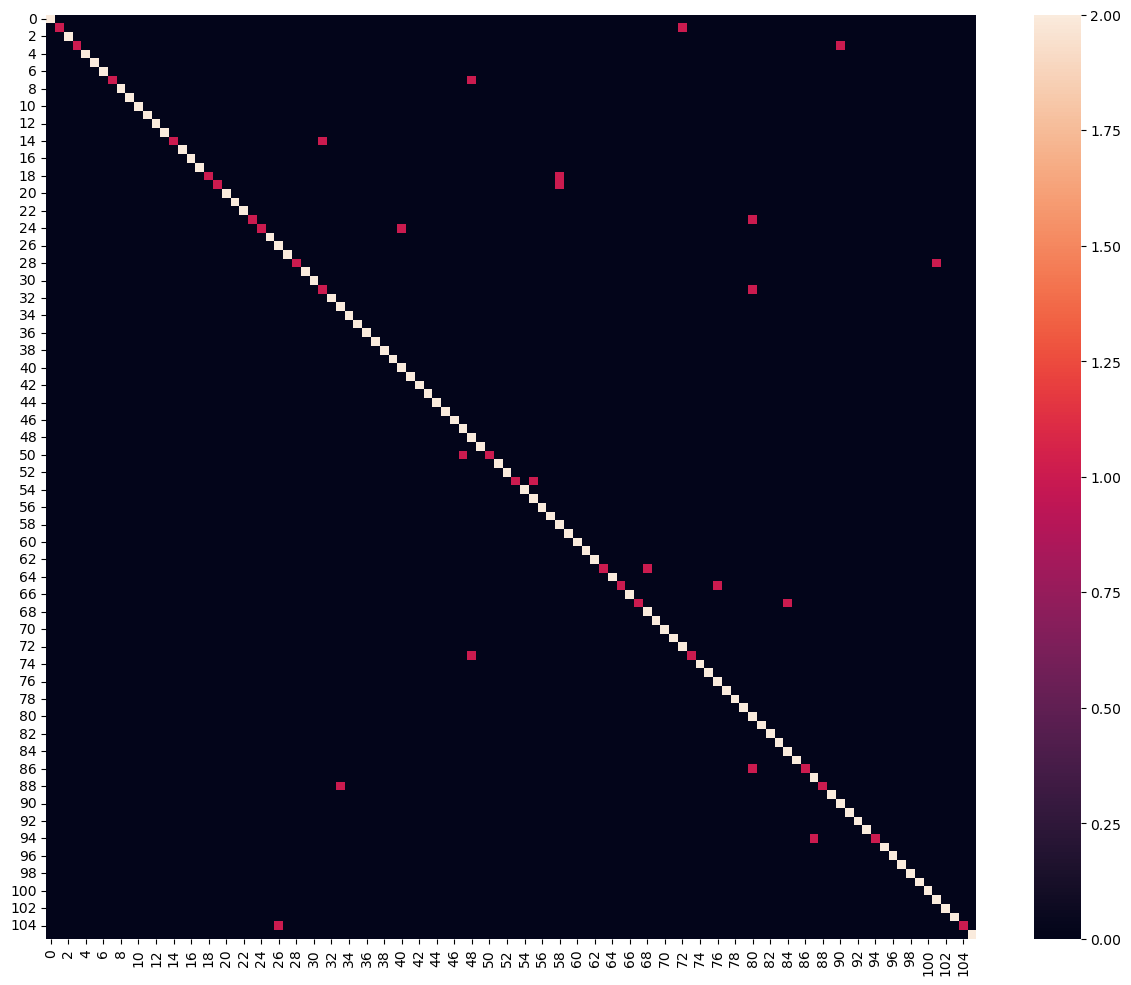

In [23]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()